In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\User\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
df_DA_USA= df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_DA_USA=df_DA_USA.dropna(subset=['salary_year_avg'])

df_DA_USA['salary_year_avg'].sample(20)

386327    285000.0
295254     58500.0
532069    118500.0
637579     50000.0
722416    144481.5
210731     49801.0
215398     75000.0
464548    148040.0
648069    127500.0
527226     85000.0
719519    137610.0
758178    102500.0
276663    112050.0
436329     65000.0
70140     112690.0
27887      82500.0
739749    110000.0
252263    125000.0
288251     75000.0
594042    125000.0
Name: salary_year_avg, dtype: float64

<Axes: >

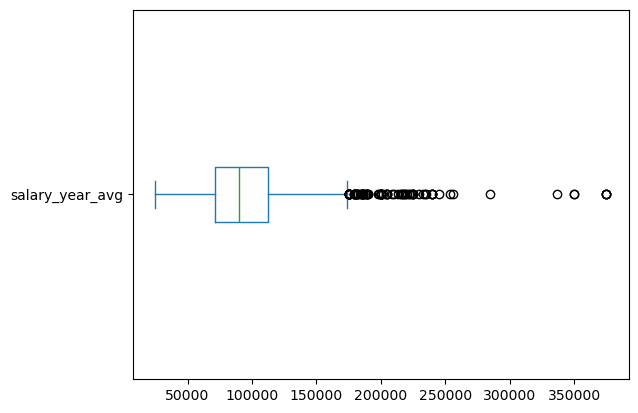

In [8]:
df_DA_USA['salary_year_avg'].plot(kind='box',vert=False)

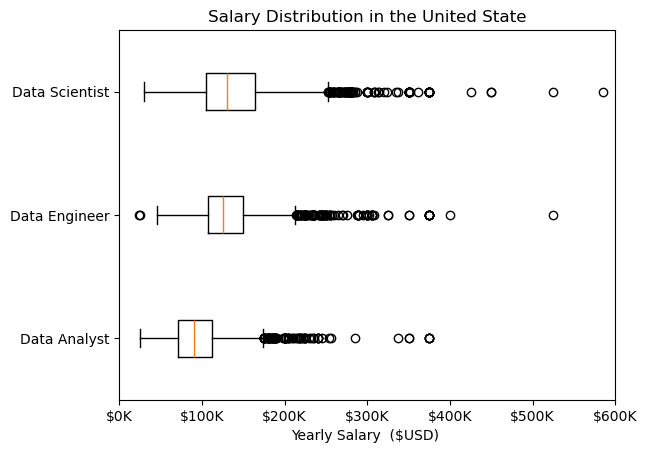

In [19]:
job_titles=['Data Analyst', 'Data Engineer','Data Scientist']

df_USA= df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_USA= df_USA.dropna(subset='salary_year_avg')
job_list = [df_USA[df_USA['job_title_short']==job_titles]['salary_year_avg'] for job_titles in job_titles]


plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United State')
plt.xlabel('Yearly Salary  ($USD) ')
plt.xlim(0,600000)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

In [13]:
df_USA['job_title_short'].value_counts()

job_title_short
Data Scientist    4553
Data Analyst      4350
Data Engineer     2915
Name: count, dtype: int64